**Метод Нилера-Мида**


In [ ]:
import matplotlib.pyplot as plt


In [ ]:
import numpy as np
import math
import scipy.optimize as opt
# Функция
def Func(X):
    return (5.0 * X[0]**2 - 4.0 * (X[1] * X[0]) + 5.0 * X[1]**2 - X[0] - X[1])
#
#  формирование начального симплекса
def makeSimplex(X, L, n, Simplex):
    qn = math.sqrt(1.0 + n) - 1.0
    q2 = L / math.sqrt(2.0) * n
    r1 = q2 * (qn + n)
    r2 = q2 * qn
    Simplex[0, :] = X
    for j in range(n):
        Simplex[j + 1, :] = X + r2
        print(Simplex[j])
        print()
    for i in range(n):
        Simplex[i + 1, i] += (r1 - r2)
        print(Simplex[i], 'Начальный треугольник')

n = 2
x0 = np.zeros(2, dtype = float) # Вектор 
# Начальная точка поиска минимума функции
x0[0] = 0.0
x0[1] = 0.0
eps = 0.001  # Точность поиска экстремума
# Начальная симплекс поиска минимума функции
Simplex = np.zeros((n + 1, n), dtype = float)
L = 0.4 # Длина ребра начального симплекса
# Формируем начальный симплекс
makeSimplex(x0, L, n, Simplex)

print()
print()
# Находим минимум функции
res = opt.minimize(Func, x0, method = 'Nelder-Mead', options = {'eps': eps, 'disp': True, 'initial_simplex': Simplex})
print(res)

[0. 0.]

[0.41411047 0.41411047]

[0. 0.] Начальный треугольник
[1.54548132 0.41411047] Начальный треугольник


Optimization terminated successfully.
         Current function value: -0.166667
         Iterations: 33
         Function evaluations: 64
 final_simplex: (array([[0.16663383, 0.16666328],
       [0.16670959, 0.16670014],
       [0.16664378, 0.16661361]]), array([-0.16666666, -0.16666666, -0.16666665]))
           fun: -0.16666666166443558
       message: 'Optimization terminated successfully.'
          nfev: 64
           nit: 33
        status: 0
       success: True
             x: array([0.16663383, 0.16666328])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: OptimizeWarning: Unknown solver options: eps


**Метод Ньютона**

df/dx = 10x - 4y -1
df/dy = 4x + 10y - 1
x = 5 * y/2 - 1/4
21 * y - 7/2 = 0 

Откуда y = 1/6
Данные значения y подставляем в выражение для x. Получаем: x = 1/6
Количество критических точек равно 1.
M1(1/6;1/6)


A = d2f/dx2(1/6:1/6) = 10
C = d2f/dy2(1/6:1/6) = 10 
B = d2f/dxdy(1/6:1/6) = -4

AC - B^2 = 84 > 0 A>0 в M1 - минимум f(M1) = -1/6

In [ ]:
from sympy import *
import math
import os

# Инициализация символов для Sympy
x = Symbol('x')
y = Symbol('y')
λ = Symbol('λ')



f = 5 * x**2 - 4 * x*y + 5 * y**2 - x - y
x0 = Matrix(2, 1, [1, 2])
εx = 0.001
εy = 0.001


print('Метод Ньютона.\nИсходная функция: 5*x1^2 - 4*x1*x2 + 5*x2^2 -x1 -x2' )

# Расчет функции
def func(point):
    return f.subs([(x, point[0]), (y, point[1])])

# Нахождение численного значения градиента функции в точке 
def get_gradient(point):
    x_derivative = f.diff(x)
    y_derivative = f.diff(y)
    a = [
        x_derivative.subs([(x, point[0]), (y, point[1])]),
        y_derivative.subs([(x, point[0]), (y, point[1])])
        ]
    return a

 

# Нахождение численного значения гессиана функции в точке 
def get_hessian(point):
    algebraic_hessian = []
    algebraic_hessian.append([f.diff(x).diff(x), f.diff(x).diff(y)])
    algebraic_hessian.append([f.diff(y).diff(x), f.diff(y).diff(y)])
    output = []
    for i in range(2):
        for j in range(2):
            output.append(algebraic_hessian[i][j].subs([(x, point[0]), (y, point[1])]))
    
    hessian = Matrix(2, 2, output)
    return hessian

def print_step(step):
    step0to3 = [float(step[i]) for i in range(4)]
    print('k = {0:.0f}: x{0:.0f} = [{1:.4f}, {2:.4f}]; f(x{0:.0f}) = {3:.4f}'.format(*step0to3))
    step4to5 = [float(step[i].evalf()) for i in range(4, 6)]
    print('Градиент: [{0:.4f}, {1:.4f}]'.format(*step4to5))
    step6to9 = [float(step[i].evalf()) for i in range(6, 10)]
    print('Гессиан: [{0:.6f}, {1:.6f}],[{2:.6f}, {3:.6f}]'.format(*step6to9))
    if len(step) > 10:
        step10to13 = [float(step[i].evalf()) for i in range(10, 14)]
        print('d = [{0:.3f}, {1:.3f}]; δx = {2:.3f}; δf = {3:.3f}\n'.format(*step10to13))


δx = False
δf = False

k = 0

while (δx > εx or δf > εy) or (not δx and not δf):
    fx0 = func(x0)

    # Находим градиент в X0
    gradient = Matrix(2,1,get_gradient(x0))
    if [gradient[0], gradient[1]] == [0, 0]:
        print('Предыдущий шаг привёл нас в точку с градиентом [0, 0]')
        print('Таким образом, минимум был найден на этой итерации.')
        break

    # Находим гессиан в X0
    hessian = get_hessian(x0)

    # Направление спуска
    d0 = -1 * hessian.inv() * gradient

    x1 = x0 + d0
    fx1 = func(x1)
    new_gradient = Matrix(2, 1, get_gradient(x1))

    δx = (x1 - x0).norm().evalf()
    δf = new_gradient.norm().evalf()
    print_step([k, x0[0], x0[1], fx0, *gradient, *hessian, *d0, δx, δf])
    x0 = x1
    k += 1

fx0 = func(x0)
gradient = Matrix(2,1,get_gradient(x0))
hessian = get_hessian(x0)
print_step([k, x0[0], x0[1], fx0, *gradient, *hessian])

print(
    '\nПолучен минимум в точке x{0} = [{1:.4f}, {2:.4f}], f(x{0}) = {3:.4f}'
    .format(k, float(x0[0].evalf()), float(x0[1].evalf()), float(fx0))
    )


Метод Ньютона.
Исходная функция: 5*x1^2 - 4*x1*x2 + 5*x2^2 -x1 -x2
k = 0: x0 = [1.0000, 2.0000]; f(x0) = 14.0000
Градиент: [1.0000, 15.0000]
Гессиан: [10.000000, -4.000000],[-4.000000, 10.000000]
d = [-0.833, -1.833]; δx = 2.014; δf = 0.000

Предыдущий шаг привёл нас в точку с градиентом [0, 0]
Таким образом, минимум был найден на этой итерации.
k = 1: x1 = [0.1667, 0.1667]; f(x1) = -0.1667
Градиент: [0.0000, 0.0000]
Гессиан: [10.000000, -4.000000],[-4.000000, 10.000000]

Получен минимум в точке x1 = [0.1667, 0.1667], f(x1) = -0.1667


Text(0, 0.5, 'Значение функции')

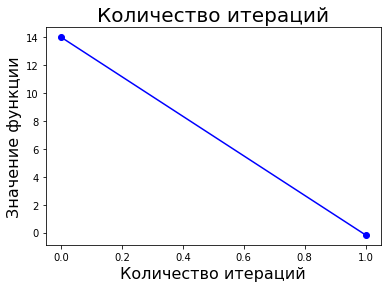

In [ ]:
k = [0, 1]
x = [14.000, -0.1667]

plt.plot(k, x, '-go', color = 'blue')
plt.title('Количество итераций', fontsize = 20)
plt.xlabel('Количество итераций', fontsize=16)
plt.ylabel('Значение функции', fontsize=16)


In [ ]:
print('Итерация', 0 , 'Значение функции', 14.0000)
print('Итерация', 1 , 'Значение функции', -0.1667)

Итерация 0 Значение функции 14.0
Итерация 1 Значение функции -0.1667


Градиентный спуск с пост шагом


In [ ]:
import numpy as np
 
def f(X):
    return 5.0 * X[0]**2 - 4.0 * (X[1] * X[0]) + 5.0 * X[1]**2 - X[0] - X[1]
def dfdx(X):
    return np.array([10* X[0] - 4* X[1] -1, 4* X[0] + 10* X[1] - 1])
 
def gradsteps(f, r, epsg=1e-3, alpha=0.4, maxiter=100
): 
    #xlist = [r]
    for itera in range(maxiter):
        arr_r = dfdx(r) 
        summa = sum(arr_r**2)
        r = r + alpha * arr_r 
        if np.sqrt(summa) < epsg:
            break      
    r = np.round(r, 6)
    return r.tolist(), f(r), itera
 
r = np.array([-10, -10])
 
gradsteps_f_x = gradsteps(f, r)
print(gradsteps_f_x)

([-1.3904733016054349e+73, -4.861545067842945e+72], 8.144871586166118e+146, 99)


Метод розенброка
+ штрафных функций


In [ ]:
from scipy.optimize import minimize, rosen

rz = lambda x: (1 - x[0]) ** 2 + 100 * (x[1] - x[0] ** 2) ** 2
h_1 = lambda x: (x[0] - 2 * x[1] + 2)
h_2 = lambda x: (-x[0] - 2 * x[1] + 6)
h_3 = lambda x: (-x[0] + 2 * x[1] + 2)

x0 = [2.3, 3]
cons = ({'type': 'ineq', 'fun': h_1},
        {'type': 'ineq', 'fun': h_2},
        {'type': 'ineq', 'fun': h_3})
res = minimize(rz, x0, constraints=cons)
print(res)

x_c = [2.3, 3]
i = 0
r = 1
b = 0.2
eps = 0.00001
tochki = []
while i < 20:
    curr_func = lambda x: rz(x) + r*(1.0/(h_1(x)**2 + h_2(x)**2 + h_3(x)**2))
    x_c = minimize(curr_func, x_c).x
    i += 1
    r *= b
    x1 = x_c
    print('Номер итерации:',i,'Координаты точки:', x_c,'Величина штрафа:', r) #minimize(curr_func, x1, options={'disp': False} ))
    tochki.append(x_c)
    if curr_func(x_c) < eps:
        break


l1 = tochki[0]
l2 = tochki[1]
l3 = tochki[2]

k = [1,2,3]

     fun: 1.2699455816363596e-09
     jac: array([ 0.00969667, -0.0040773 ])
 message: 'Optimization terminated successfully.'
    nfev: 84
     nit: 19
    njev: 19
  status: 0
 success: True
       x: array([1.00000265, 1.00000174])
Номер итерации: 1 Координаты точки: [0.97374641 0.94811446] Величина штрафа: 0.2
Номер итерации: 2 Координаты точки: [0.99495003 0.98991398] Величина штрафа: 0.04000000000000001
Номер итерации: 3 Координаты точки: [0.99899588 0.99799052] Величина штрафа: 0.008000000000000002
Номер итерации: 4 Координаты точки: [0.99979597 0.99959152] Величина штрафа: 0.0016000000000000005
Номер итерации: 5 Координаты точки: [0.99995561 0.99991112] Величина штрафа: 0.00032000000000000013
Номер итерации: 6 Координаты точки: [0.99998754 0.99997506] Величина штрафа: 6.400000000000002e-05


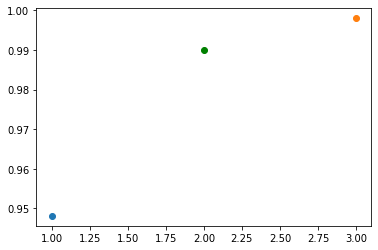

In [ ]:
plt.plot(1, l1[1], ':o')
plt.plot(2, l2[1], '-go')
plt.plot(3, l3[1], ':o')


In [ ]:
def func(x1, x2):
    res = -x1 ** 2 - x2 ** 2
    return res
x0 = [6, 7]
#o1 (x[0] - 7) ** 2 + (x[1] - 7) ** 2 <= 18
#o2 x1 >= 0
#o3 x2 >= 0
a = 0.1
def g(x1,x2):
    return round((x1 - 7)**2 + (x2 - 7)**2, 3)
dx1 = -2 * x0[0]
dgdx1 = -2 * x0[0] + 14
dfdx2 = -2 * x0[1]
dgdx2 = -2 * x0[1] + 14
# print( dgdx1, dx1, dgdx2, dfdx2)

def x1(x1):
    return round(x1 + a * -2 * x1, 2)
def x2(x2):
    return round(x2 + 0.1 * -2 * x2, 2)
k = 1

x1_11 = (6 + a * dx1 * 6)
x2_12 = (7 + a * dx1 * 7)
g1 = g(x1_11,x2_12)
print('k =',k,'x1_11 =',x1_11,'x2_12 =', x2_12,'gx =', round(g1, 2))
print('< 18, Полученное решение является допустимым')
print()
k = 2
x1_21 = x1_11 + a * (dx1) * x1_11
x2_22 = x2_12 + a * (dx1) * x2_12
X2_22 = x2(x2_12)
g2 = g(x1_21, x2_22)
print('k =',k,'x1_21 =',x1_21,'x2_22 =', X2_22,'gx =', round(g2, 2),)
print('< 18, Полученное решение является допустимым','f = –34,816')
print()
k = 3
x1_31 = x1(x1_21)
x2_32 = x2(X2_22)
g3 = g(x1_31,x2_32)
print('k =',k,'x1_31 =',x1_31,'x2_32 =', x2_32,'gx =', round(g3, 2),)
print('Полученное на итерации 3 решение не является допустимым, g(x3) > 18')
print()
k = 4
def ned(x1, al):
    return x1 + (al * -2 * x1) + al*(- 2 * x1 + 14)

def alfa(alfa, g) :
    return alfa - (a * g)
print(alfa(0, g3))
x1_41 = ned(x1_31, al= 0.91)
x2_42 = ned(x2_32, al= 0.91)
g4 = g(x1_41, x2_42)
print(x1_41, x2_42, g4)

print(func(4.02, 4.02))

Гессиан функции — симметрическая квадратичная форма, описывающая поведение функции во втором порядке.

Матрица Гессе этой квадратичной формы образована вторыми частными производными функции


In [ ]:
from scipy.optimize import minimize, rosen

rz = lambda x: - x[0] ** 2 - x[1] ** 2
h_1 = lambda x: 18 - (x[0] - 7)**2 + (x[1] - 7)**2


x0 = [6, 7]
cons = ({'type': 'ineq', 'fun': h_1})
res = minimize(rz, x0, constraints=cons)
print(res)

x_c = [6, 7]
i = 0
r = 1
b = 0.2
eps = 0.001
tochki = []
while i < 15:
    curr_func = lambda x: rz(x) + r*(1.0/(h_1(x)**2))
    x_c = minimize(curr_func, x_c).x
    i += 1
    r *= b
    x1 = x_c
    print('Номер итерации:',i,'Координаты точки:', x_c,'Величина штрафа:', r) #minimize(curr_func, x1, options={'disp': False} ))
    tochki.append(x_c)
for i in range(len(tochki)):
    print(tochki[i])

# l1 = tochki[0]
# l2 = tochki[1]
# l3 = tochki[2]
# print(l1[1])
# k = [1,2,3]

     fun: -2.383414822073947e+19
     jac: array([0., 0.])
 message: 'Optimization terminated successfully.'
    nfev: 24
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([3.17734532e+09, 3.70656512e+09])
Номер итерации: 1 Координаты точки: [2.35265788e+08 2.74458126e+08] Величина штрафа: 0.2
Номер итерации: 2 Координаты точки: [2.35265788e+08 2.74458126e+08] Величина штрафа: 0.04000000000000001
Номер итерации: 3 Координаты точки: [2.35265788e+08 2.74458126e+08] Величина штрафа: 0.008000000000000002
Номер итерации: 4 Координаты точки: [2.35265788e+08 2.74458126e+08] Величина штрафа: 0.0016000000000000005
Номер итерации: 5 Координаты точки: [2.35265788e+08 2.74458126e+08] Величина штрафа: 0.00032000000000000013
Номер итерации: 6 Координаты точки: [2.35265788e+08 2.74458126e+08] Величина штрафа: 6.400000000000002e-05
Номер итерации: 7 Координаты точки: [2.35265788e+08 2.74458126e+08] Величина штрафа: 1.2800000000000006e-05
Номер итерации: 8 Координаты точки: [2.35265788